# Project 2: Cardiovascular Disease Dataset

### Part 1 - Data Cleaning

#### By: Amin
For this notebook, I will be cleaning the dataset & do an initial exploratory data analysis.  
<hr>

**About Dataset**

Data description
There are 3 types of input features:

Objective: factual information.  
Examination: results of medical examination.  
Subjective: information given by the patient.  

The dataset consists of 70 000 records of patients data, 11 features + target.  

Features:  
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  

Data Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

## Objectives

1) Determine the patient profile of those with and without a cardiovascular disease by looking at their lifestyle choices and/or risk factors.  

2) Create a model that would be able to predict whether an individual has a cardiovascular disease or not.  

## 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('ticks')

import warnings 
warnings.filterwarnings('ignore')

## 2. Getting the Data

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 3. Initial EDA

In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.set_index('id', inplace = True)

### 3. 1 Computing the Age in years

In [6]:
df['age'] = round(df['age'] / 365, 0)
df['age']

id
0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
99993    53.0
99995    62.0
99996    52.0
99998    61.0
99999    56.0
Name: age, Length: 70000, dtype: float64

### 3.2 Changing the numbering for cardio (target) column

- 0 for female
- 1 for male

In [7]:
df['gender'] = np.where(df['gender'] == 1, 'female', np.where(df['gender'] == 2, 'male', 0))

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0
active,70000.0,0.803729,0.397179,0.0,1.0,1.0,1.0,1.0


### Observations:  

Immediately noticed something is off for 4 variables:  

1) <strong>height</strong> - Minimum age in dataset is around 30yo. Seeing a minimum height of 55cm may indicate typos/incorrect data.  

2) <strong>weight</strong> - Again, minimum age is about 30yo. A minimum weight of 10kg may indicate typos/incorrect data.  

3) <strong>ap_hi</strong> - Minimum systolic pressure cannot be negative. Could be a typo where a negative sign was accidentally added.  

4) <strong>ap_lo</strong> - Minimum diastolic pressure cannot be negative. Could be a typo where a negative sign was accidentally added.  

### 3.3 Investigating the height

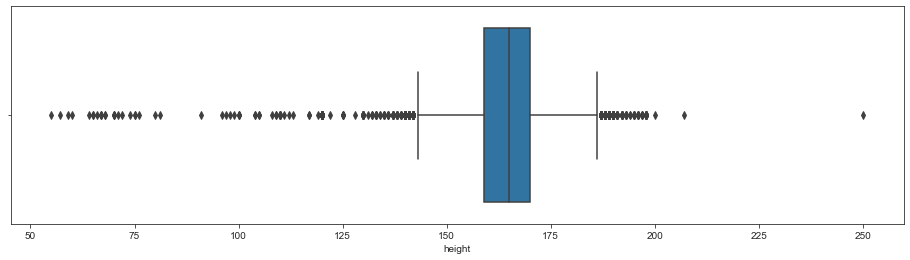

In [9]:
plt.figure(figsize = (16, 4))
sns.boxplot(x='height', data = df)
plt.show()

<strong>Observations:</strong>  
- A lot of outliers present on both ends.  

<strong>Action Plan:</strong>  
- I will be removing outliers 1.5 x Q1 only as the height doesn't make sense for people with age 30 at the minimum in this dataset.  

In [10]:
# Getting the 25th & 75th percentile
q1 = df.quantile(0.25, axis = 0)['height']
q3 = df.quantile(0.75, axis = 0)['height']

# Getting the IQR
iqr = q3 - q1

# Getting the lower limits
lower_iqr = q1 - (1.5 * iqr)

print('25th Quartile is: ' + str(q1))
print('75th Quartile is: ' + str(q3))
print('IQR is: ' + str(iqr))
print('Lowest acceptable limit: ' + str(lower_iqr))

25th Quartile is: 159.0
75th Quartile is: 170.0
IQR is: 11.0
Lowest acceptable limit: 142.5


In [11]:
# Filtering out the outliers
df1 = df[(df['height'] > lower_iqr)]
df1

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1
4,48.0,female,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,male,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,female,158,126.0,140,90,2,2,0,0,1,1
99996,52.0,male,183,105.0,180,90,3,1,0,1,0,1


### 3.4 Investigating the weight

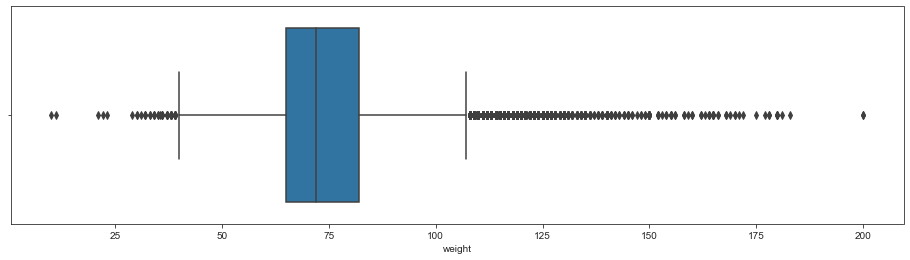

In [12]:
plt.figure(figsize = (16, 4))
sns.boxplot(x='weight', data = df1)
plt.show()

<strong>Observations:</strong>  
- A lot of outliers present on both ends.  

<strong>Action Plan:</strong>  
- As with the height, I will be removing outliers 1.5 x Q1 only as the weight doesn't make sense for people with age 30 at the minimum in this dataset.  

In [13]:
# Getting the 25th & 75th percentile
q1_weight = df.quantile(0.25, axis = 0)['weight']
q3_weight = df.quantile(0.75, axis = 0)['weight']

# Getting the IQR
iqr_weight = q3_weight - q1_weight

# Getting the lower limits
lower_iqr_weight = q1_weight - (1.5 * iqr_weight)

print('25th Quartile is: ' + str(q1_weight))
print('75th Quartile is: ' + str(q3_weight))
print('IQR is: ' + str(iqr_weight))
print('Lowest acceptable limit: ' + str(lower_iqr_weight))

25th Quartile is: 65.0
75th Quartile is: 82.0
IQR is: 17.0
Lowest acceptable limit: 39.5


In [14]:
# Filtering out the outliers
df2 = df1[(df1['weight'] > lower_iqr_weight)]
df2

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1
4,48.0,female,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,male,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,female,158,126.0,140,90,2,2,0,0,1,1
99996,52.0,male,183,105.0,180,90,3,1,0,1,0,1


### 3.5 Investigating the systolic blood pressure: ap_hi

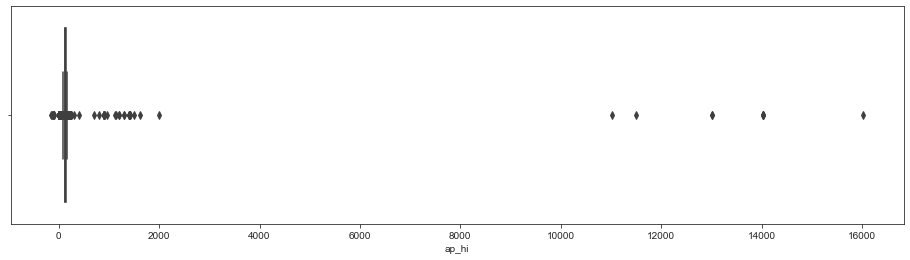

In [15]:
plt.figure(figsize = (16, 4))
sns.boxplot(x='ap_hi', data = df2)
plt.show()

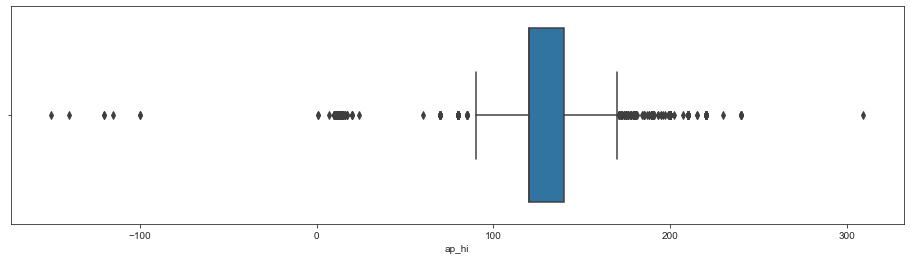

In [16]:
df2_lower = df2[df2['ap_hi'] < 400]

plt.figure(figsize = (16, 4))
sns.boxplot(x='ap_hi', data = df2_lower)
plt.show()

<strong>Observations:</strong>  
- Unrealistic systolic bp with some as high as 16020 and as low as -150. Most probably incorrectly entered data. Those below zero might just be typos where a negative sign was accidentally added.  

<strong>Action Plan:</strong>  
- I will be removing these outliers as it obviously doesn't make sense. 
- For negative systolic bp, I will be removing the "-" sign.  

In [17]:
df_ap_hi_neg = df2[df2.ap_hi <= 0]
df_ap_hi_neg

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
6525,42.0,female,165,78.0,-100,80,2,1,0,0,1,0
22881,61.0,male,161,90.0,-115,70,1,1,0,0,1,0
29313,43.0,female,153,54.0,-100,70,1,1,0,0,1,0
34295,50.0,female,162,74.0,-140,90,1,1,0,0,1,1
36025,40.0,male,168,50.0,-120,80,2,1,0,0,0,1
50055,64.0,male,168,59.0,-150,80,1,1,0,0,1,1
66571,65.0,male,160,59.0,-120,80,1,1,0,0,0,0


In [18]:
df2['ap_hi'].replace({-100:100, -115:115, -120:120, -140:140, -150:150}, inplace=True)

In [19]:
# Getting the 25th & 75th percentile
q1_ap_hi = df.quantile(0.25, axis = 0)['ap_hi']
q3_ap_hi = df.quantile(0.75, axis = 0)['ap_hi']

# Getting the IQR
iqr_ap_hi = q3_ap_hi - q1_ap_hi

# Getting the upper & lower limits
lower_iqr_ap_hi = q1_ap_hi - (2 * iqr_ap_hi)
upper_iqr_ap_hi = q3_ap_hi + (2 * iqr_ap_hi)

print('25th Quartile is: ' + str(q1_ap_hi))
print('75th Quartile is: ' + str(q3_ap_hi))
print('IQR is: ' + str(iqr_ap_hi))
print('Lowest acceptable limit: ' + str(lower_iqr_ap_hi))
print('Highest acceptable limit: ' + str(upper_iqr_ap_hi))

25th Quartile is: 120.0
75th Quartile is: 140.0
IQR is: 20.0
Lowest acceptable limit: 80.0
Highest acceptable limit: 180.0


In [20]:
# Filtering out the outliers
df3 = df2[(df2['ap_hi'] > lower_iqr_ap_hi) & (df2['ap_hi'] < upper_iqr_ap_hi)]
df3

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1
4,48.0,female,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,58.0,female,165,80.0,150,80,1,1,0,0,1,1
99993,53.0,male,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,female,158,126.0,140,90,2,2,0,0,1,1


### 3.6 Investigating diastolic blood pressure: ap_lo

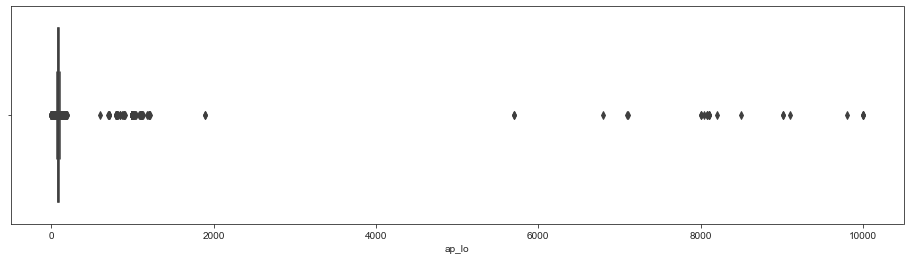

In [21]:
plt.figure(figsize = (16, 4))
sns.boxplot(x='ap_lo', data = df3)
plt.show()

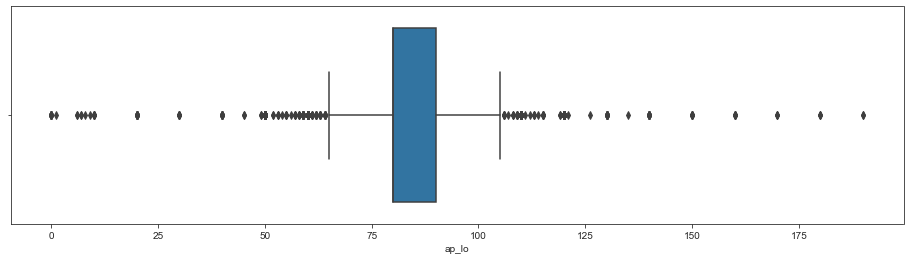

In [22]:
df3_lower = df3[df3['ap_lo'] < 200]

plt.figure(figsize = (16, 4))
sns.boxplot(x='ap_lo', data = df3_lower)
plt.show()

<strong>Observations:</strong>  
- Unrealistic diastolic bp with some as high as 11000 and as low as 0. Most probably incorrectly entered data.  

<strong>Action Plan:</strong>  
- I will be removing these outliers as it obviously doesn't make sense.  

In [23]:
# Getting the 25th & 75th percentile
q1_ap_lo = df3.quantile(0.25, axis = 0)['ap_lo']
q3_ap_lo = df3.quantile(0.75, axis = 0)['ap_lo']

# Getting the IQR
iqr_ap_lo = q3_ap_lo - q1_ap_lo

# Getting the upper & lower limits
lower_iqr_ap_lo = q1_ap_lo - (2 * iqr_ap_lo)
upper_iqr_ap_lo = q3_ap_lo + (2 * iqr_ap_lo)

print('25th Quartile is: ' + str(q1_ap_lo))
print('75th Quartile is: ' + str(q3_ap_lo))
print('IQR is: ' + str(iqr_ap_lo))
print('Lowest acceptable limit: ' + str(lower_iqr_ap_lo))
print('Highest acceptable limit: ' + str(upper_iqr_ap_lo))

25th Quartile is: 80.0
75th Quartile is: 90.0
IQR is: 10.0
Lowest acceptable limit: 60.0
Highest acceptable limit: 110.0


In [24]:
# Filtering out the outliers
new_df = df3[(df3['ap_lo'] > lower_iqr_ap_lo) & (df3['ap_lo'] < upper_iqr_ap_lo)]
new_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1
8,60.0,female,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,58.0,female,165,80.0,150,80,1,1,0,0,1,1
99993,53.0,male,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,female,158,126.0,140,90,2,2,0,0,1,1


### 3.7 Calculating BMI

In [25]:
new_df['bmi'] = round(new_df['weight'] / (new_df['height']/100) ** 2, 1)
new_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1,28.7
8,60.0,female,151,67.0,120,80,2,2,0,0,0,0,29.4


### 3.8 Review of Cleaned Dataset

In [26]:
print("Before Cleaning:" + str(df.shape))
print("After Cleaning:" + str(new_df.shape))

Before Cleaning:(70000, 12)
After Cleaning:(64335, 13)


In [27]:
clean_data = round((len(new_df) / len(df)) * 100, 2)
print('Percentage of Dataset remaining: ' + str(clean_data) + '%')

Percentage of Dataset remaining: 91.91%


- Around 10% of the data was lost.  

In [29]:
new_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1,28.7
8,60.0,female,151,67.0,120,80,2,2,0,0,0,0,29.4


## 4. Saving our Cleaned Data

In [28]:
new_df.to_csv('cleaned_data.csv', index = False)